## fit_sensor.ipynb

### WESmith 01/28/20

In [133]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pdb
%matplotlib inline

In [134]:
py.rcParams['figure.figsize'] = (15, 6)
epsi = np.finfo(float).eps  # minimun float to avoid log10() issues

In [238]:
# DATA for GP2Y0A21YKOF IR sensor: white ping-pong ball on slide, distance from sensor to front of ping-pong ball
# each row: distance (cm), run 1: analogRead() mean over 500 readings, analogRead() stddev over 500 readings, 
# then run2, run3; each run has a separate placement of the white ping-pong ball on the ball slide; see
# 1/28/20 enotes
data = np.array([
  [10,   467, 14,  463, 12,  466, 12], 
  [15,  291, 13,  289, 11,  290, 11],
  [20,  220, 13,  218, 11,  218, 10],
  [25,  195, 12,  194, 10,  194, 10],
  [30,   187, 13,  186, 10,  186, 10],
  [35,   180, 13,  178, 10,  179, 10],
  [40,   172, 12,  169, 11,  169, 10],
  [45,   160, 13,  159, 10,  159, 10],
  [50,   148, 12,  146, 10,  146, 11]])

In [239]:
# transform distances to mm (for final fit)
data[:,0] = 10 * data[:,0]
data

array([[100, 467,  14, 463,  12, 466,  12],
       [150, 291,  13, 289,  11, 290,  11],
       [200, 220,  13, 218,  11, 218,  10],
       [250, 195,  12, 194,  10, 194,  10],
       [300, 187,  13, 186,  10, 186,  10],
       [350, 180,  13, 178,  10, 179,  10],
       [400, 172,  12, 169,  11, 169,  10],
       [450, 160,  13, 159,  10, 159,  10],
       [500, 148,  12, 146,  10, 146,  11]])

### Look at the three runs together (each run has a mean and a standard deviation determined by 500 measurements)

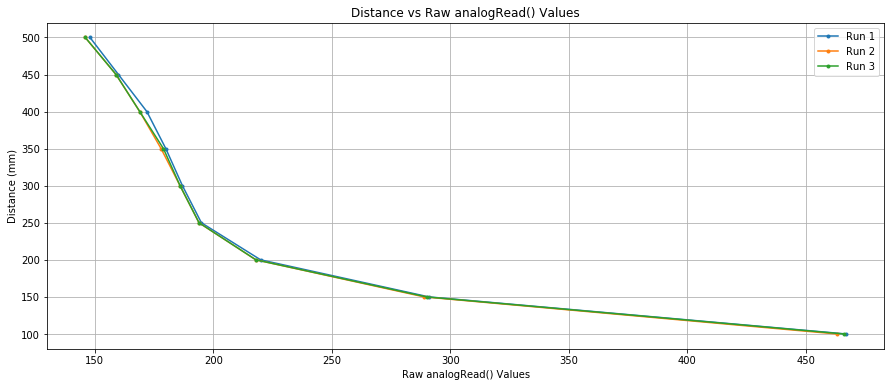

In [350]:
labels = {1:'Run 1', 3:'Run 2', 5:'Run 3'}
dist = data[:,0]
for k in [1, 3, 5]:
    plt.plot(data[:,k], dist, '.-', label=labels[k])
plt.grid(True)
plt.legend()
plt.ylabel("Distance (mm)")
plt.xlabel("Raw analogRead() Values")
plt.title("Distance vs Raw analogRead() Values")
plt.show()

In [358]:
# calculate averages over the runs
means_analog = np.mean(data[:,[1,3,5]], axis=1)
means_stddev = np.mean(data[:,[2,4,6]], axis=1)
means_analog

array([465.33333333, 290.        , 218.66666667, 194.33333333,
       186.33333333, 179.        , 170.        , 159.33333333,
       146.66666667])

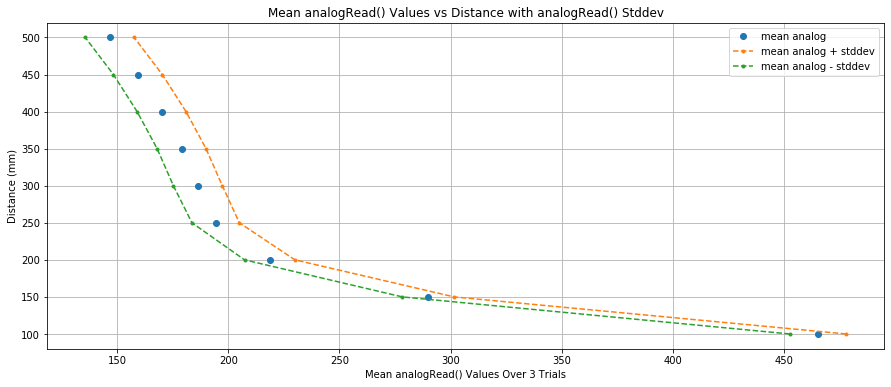

In [353]:
plt.plot(means_analog, dist, 'o', label='mean analog')
plt.plot(means_analog + means_stddev, dist, '.--', label='mean analog + stddev')
plt.plot(means_analog - means_stddev, dist, '.--', label='mean analog - stddev')
plt.grid(True)
plt.legend()
plt.ylabel("Distance (mm)")
plt.xlabel("Mean analogRead() Values Over 3 Trials")
plt.title("Mean analogRead() Values vs Distance with analogRead() Stddev")
plt.show()

### After much experimentation polynomial fitting and piecewise polynomial fitting all produced less than satisfactory results (experimentation below has been deleted). A simple linear interpolation was then used. This will be implemented on the arduino.

In [355]:
fine_analog_values = np.linspace(means_analog[0], means_analog[-1], 100)

In [356]:
# NOTE: interp() requires second argument to be in ascending order, thus it was necessary to flip it and flip
# its associated distance values, so that they still match up. 
fine_distance = np.interp(fine_analog_values, np.flip(means_analog), np.flip(dist))

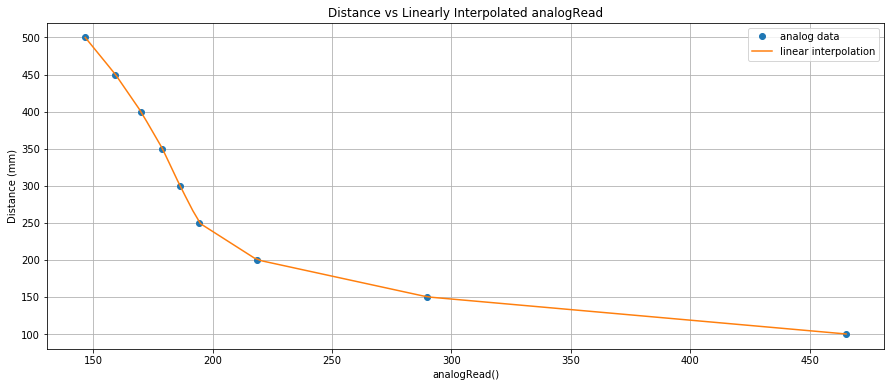

In [357]:
plt.plot(means_analog, dist, 'o', label='analog data')
plt.plot(fine_analog_values, fine_distance, '-', label='linear interpolation')
plt.legend()
plt.ylabel("Distance (mm)")
plt.xlabel("analogRead()")
plt.grid()
plt.title("Distance vs Linearly Interpolated analogRead")
plt.show()